Actual Columns Found:
Index(['Amount_of_chicken', 'Time', 'Temperature', 'Humidity', 'AQI', 'WQI',
       'Humidex'],
      dtype='object')

DataFrame Head:
   Amount_of_chicken   Time  Temperature  Humidity  AQI  WQI  Humidex
0               1000  06:00         36.6        72   85   60     47.5
1                700  09:00         37.2        63   80   58     46.9
2               1200  12:00         39.1        67   90   62     48.2
3                800  15:00         38.0        61   85   59     47.4
4               1100  18:00         37.3        64   79   55     47.0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amount_of_chicken  541 non-null    int64  
 1   Time               541 non-null    object 
 2   Temperature        541 non-null    float64
 3   Humidity           541 non-null    int64  
 4   AQI           

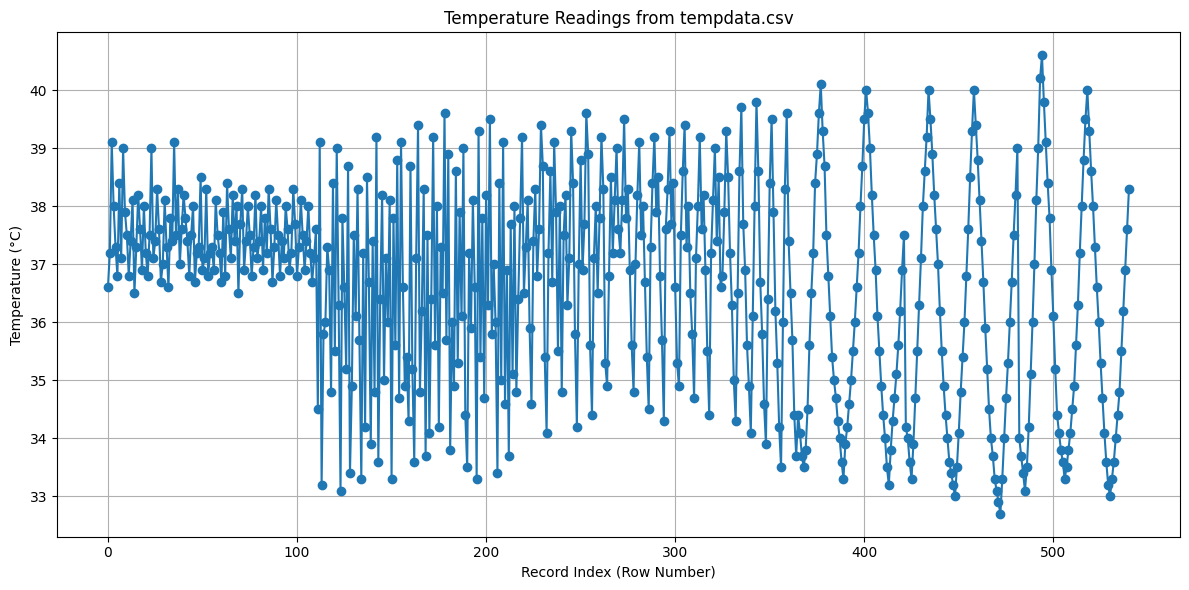

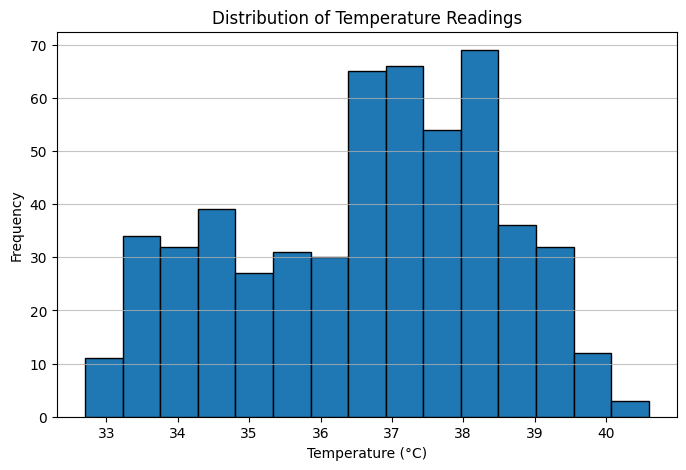

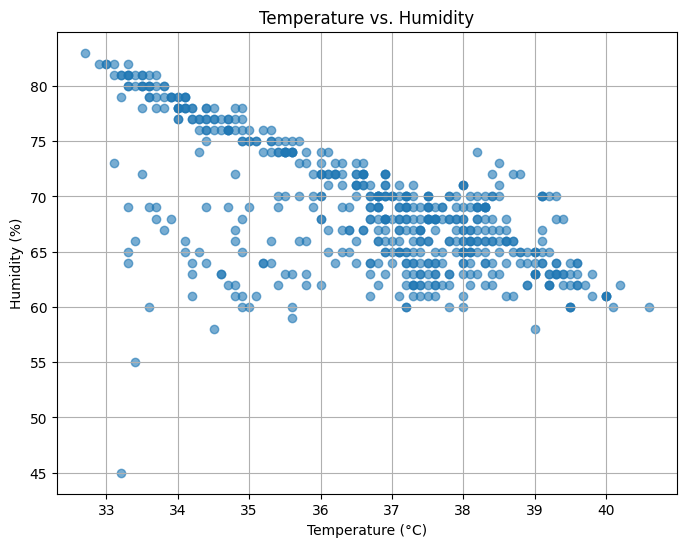

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.cm as cm # No longer needed for this simple example
# import numpy as np # No longer needed for this simple example

# Load dataset
file_path = "tempdata2.csv"
try:
    # IMPORTANT: Check if your separator is comma ',' or tab '\t'
    df = pd.read_csv(file_path, encoding='utf-8', sep=",") # Assuming comma separated
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the CSV file is in the correct directory.")
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Strip spaces from column names
df.columns = df.columns.str.strip()

# --- Verification ---
print("Actual Columns Found:")
print(df.columns) # Print the columns pandas actually found
print("\nDataFrame Head:")
print(df.head())
print("\nData Info:")
df.info()

# --- Check for the column you WANT to plot ---
# Example: Check if 'Temperature' column exists
if 'Temperature' not in df.columns:
     raise KeyError("The required 'Temperature' column is missing from the CSV.")

# --- Remove code sections that relied on the old columns ---
# No 'Time' column conversion needed
# No 'Animal_ID' needed
# No 'Health_Status' classification needed

# --- Plot 1: Modified to Plot Available 'Temperature' Data ---
plt.figure(figsize=(12, 6))

# Plot Temperature against the row index (or another column if you have one representing time/sequence)
plt.plot(df.index, df['Temperature'], marker="o", linestyle='-')

plt.xlabel("Record Index (Row Number)") # Changed label
plt.ylabel("Temperature (°C)") # Changed label - specify unit if known
plt.title("Temperature Readings from tempdata.csv") # Changed title
plt.grid(True)
plt.tight_layout() # Use standard tight_layout
plt.show()

# --- Plot 2: Removed or Changed ---
# The original Plot 2 (Health Status) is not applicable.
# You could create a histogram of Temperature instead:
plt.figure(figsize=(8, 5))
plt.hist(df['Temperature'].dropna(), bins=15, edgecolor='black') # dropna handles missing values
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Readings")
plt.grid(axis='y', alpha=0.75)
plt.show()

# You could add more plots here for Humidity, AQI, etc. in a similar way.
# Example: Temperature vs Humidity scatter plot
if 'Humidity' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Temperature'], df['Humidity'], alpha=0.6)
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Humidity (%)")
    plt.title("Temperature vs. Humidity")
    plt.grid(True)
    plt.show()
else:
    print("Skipping Temp vs Humidity plot: 'Humidity' column not found.")

Columns in dataset:
Index(['Amount_of_chicken', 'Time', 'Temperature', 'Humidity', 'AQI', 'WQI',
       'Humidex'],
      dtype='object')

First few rows of dataset:
   Amount_of_chicken   Time  Temperature  Humidity  AQI  WQI  Humidex
0               1000  06:00         36.6        72   85   60     47.5
1                700  09:00         37.2        63   80   58     46.9
2               1200  12:00         39.1        67   90   62     48.2
3                800  15:00         38.0        61   85   59     47.4
4               1100  18:00         37.3        64   79   55     47.0

Dataset with Health Status:
   Amount_of_chicken   Time  Temperature  Humidity  AQI  WQI  Humidex  \
0               1000  06:00         36.6        72   85   60     47.5   
1                700  09:00         37.2        63   80   58     46.9   
2               1200  12:00         39.1        67   90   62     48.2   
3                800  15:00         38.0        61   85   59     47.4   
4               1100

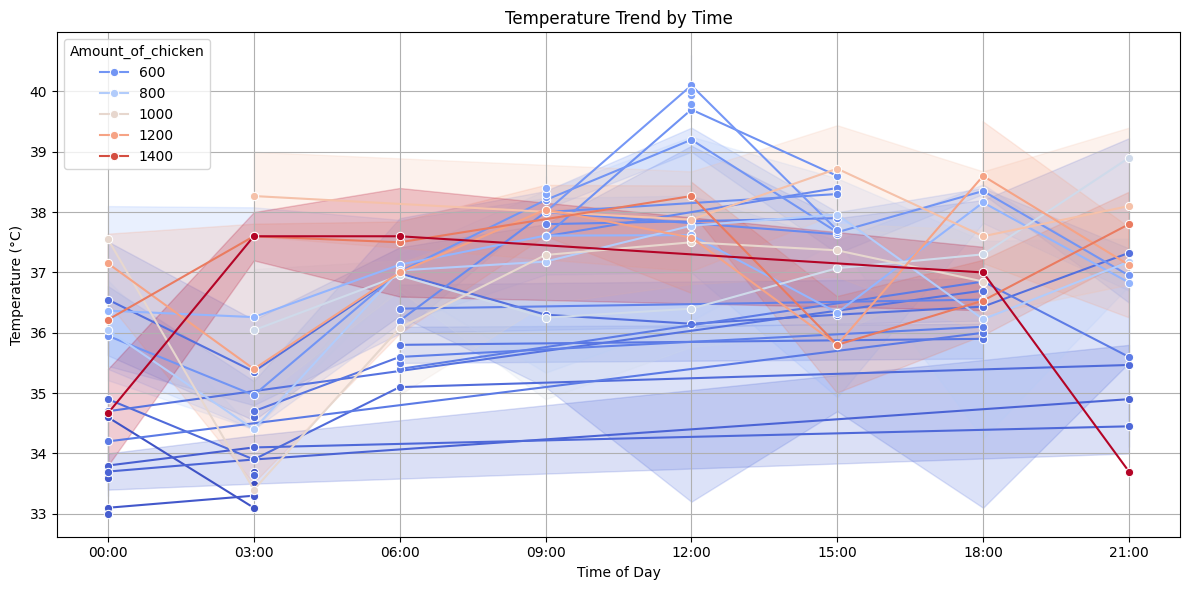

C:\Users\aswin\AppData\Local\Temp\ipykernel_13940\3711112310.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Health_Status", data=df, palette={"Healthy": "green", "Unhealthy": "red"})


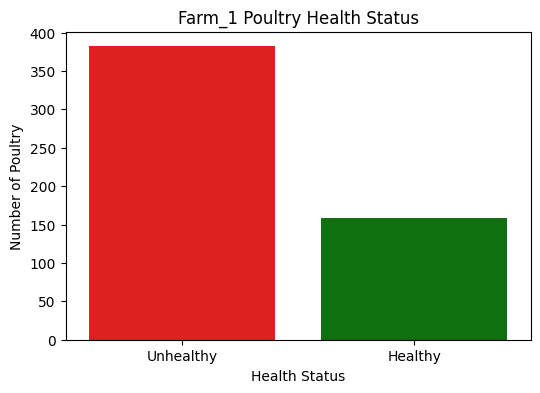

C:\Users\aswin\AppData\Local\Temp\ipykernel_13940\3711112310.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="Time", y="Temperature", marker="o", palette="coolwarm")


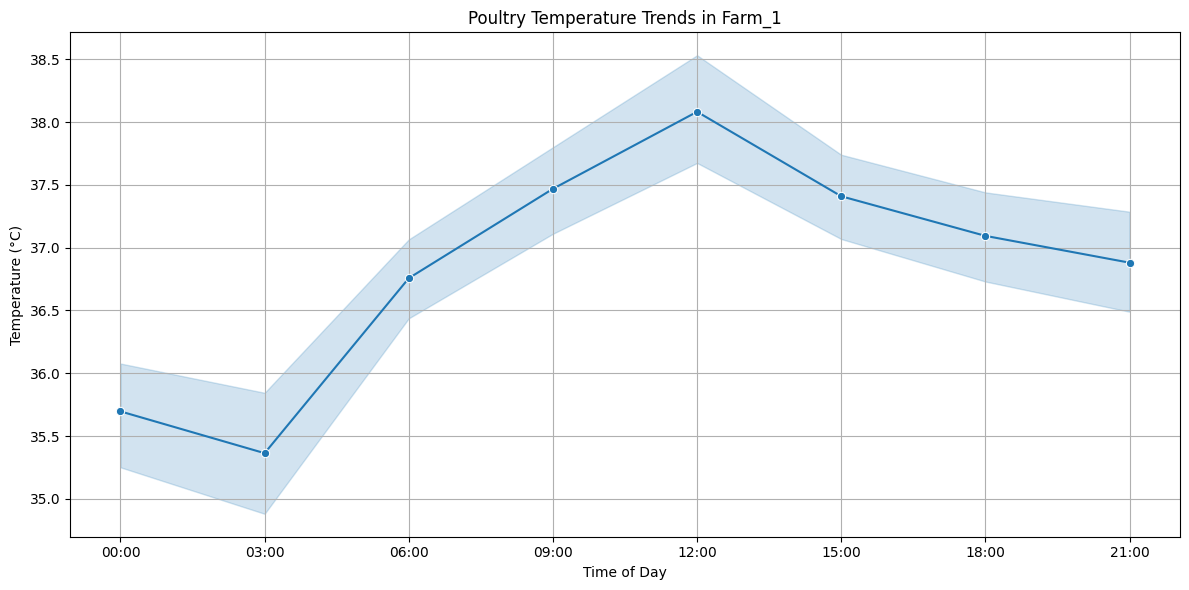

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:\\Users\\aswin\\OneDrive\\Desktop\\Torch Projects\\Chicken-Disease\\Notebooks\\tempdata2.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in dataset:")
print(df.columns)

# Print the first few rows of the dataset to verify data
print("\nFirst few rows of dataset:")
print(df.head())

# Check for missing 'Time' column
if 'Time' not in df.columns:
    raise KeyError("The 'Time' column is missing. Check the dataset headers.")

# Convert 'Time' to categorical for correct ordering
time_order = ["00:00", "03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00"]
df['Time'] = pd.Categorical(df['Time'], categories=time_order, ordered=True)

# Define health classification based on temperature
def classify_health(temp):
    return "Healthy" if 37.5 <= temp <= 39.0 else "Unhealthy"

df["Health_Status"] = df["Temperature"].apply(classify_health)

# Print dataset to verify correctness
print("\nDataset with Health Status:")
print(df.head())

# Plot 1: Line Plot for Temperature Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Time", y="Temperature", hue="Amount_of_chicken", marker="o", palette="coolwarm")
plt.title("Temperature Trend by Time")
plt.xlabel("Time of Day")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Bar Plot for Healthy vs Unhealthy Poultry
plt.figure(figsize=(6, 4))
sns.countplot(x="Health_Status", data=df, palette={"Healthy": "green", "Unhealthy": "red"})
plt.xlabel("Health Status")
plt.ylabel("Number of Poultry")
plt.title("Farm_1 Poultry Health Status")
plt.show()

# Plot 3: Line Plot for Temperature Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Time", y="Temperature", marker="o", palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Temperature (°C)")
plt.title("Poultry Temperature Trends in Farm_1")
plt.grid(True)
plt.tight_layout()
plt.show()

